<a href="https://colab.research.google.com/github/Barkotfrew/GDG_Student_Session_AI-ML_G1/blob/main/Copy_of_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2



Dataset shape (rows, columns): (699, 11)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None

Dataset statistics:
       Sample code 

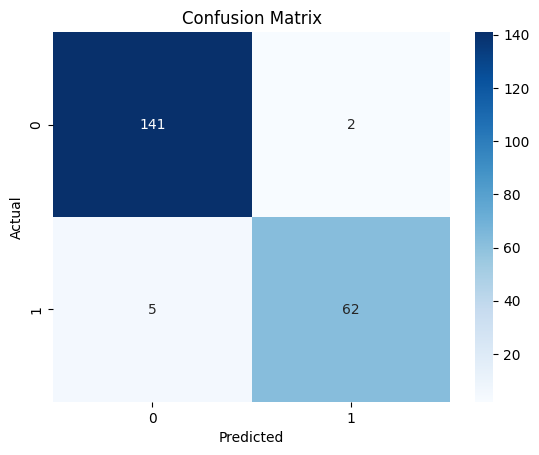


Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

csv_file = "breast_cancer_bd.csv"

if not os.path.isfile(csv_file):
    print(f"Error: '{csv_file}' not found!")
    print("Upload the CSV file in Colab before running this code.")
    exit()

df = pd.read_csv(csv_file)

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset shape (rows, columns):", df.shape)
print("\nDataset info:")
print(df.info())
print("\nDataset statistics:")
print(df.describe())
print("\nMissing values in each column:")
print(df.isnull().sum())


df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.nan)

df['Bare Nuclei'] = df['Bare Nuclei'].astype(float)

df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df['Bare Nuclei'].median())

print("\nMissing values after cleaning:")
print(df.isnull().sum())

df = df.drop(columns=['Sample code number'], errors='ignore')

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\nTraining set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Testing set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("\nFirst 10 predictions:", y_pred[:10])

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)
